# Voltaje y vectores de campo electrico 6000 datos de laboratorio

Este código carga un archivo Excel que contiene 6000 datos de voltaje obtenidos en mi tesis de maestría, 1. realiza una revisión de *valores faltantes y muestra estadísticas descriptivas básicas para entender la distribución de los datos*. Luego, visualiza gráficamente* la dispersión de los valores mediante un diagrama de caja (boxplot), lo que permite identificar posibles valores atípicos*. A continuación, *estandariza los datos utilizando StandardScaler para que todas las variables tengan la misma escala*, lo cual es crucial para los algoritmos de machine learning. Después, aplica *el método del codo para determinar el número óptimo de grupos (clusters) al ejecutar el algoritmo de KMeans con diferentes cantidades de clusters (de 1 a 10)*, y calcula *el WCSS (Suma de los Cuadrados de las Distancias dentro de los clusters) para cada caso*. Finalmente, grafica esos resultados, lo que permite *visualizar el punto óptimo donde agregar más clusters deja de mejorar significativamente la agrupación*, ayudando así a seleccionar el número adecuado de grupos para identificar patrones en tus datos de voltaje.

Saving Datosfinales.xlsx to Datosfinales (1).xlsx
Valores faltantes: 0

Estadísticas descriptivas:
              20       20.1       20.2       20.3       20.4       20.5  \
count  86.000000  86.000000  86.000000  86.000000  86.000000  86.000000   
mean   10.983837  10.963837  11.006395  10.954535  10.891512  10.822558   
std     6.181124   6.183168   6.200345   6.234980   6.244962   6.315040   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     6.222500   6.222500   6.117500   6.065000   6.050000   5.925000   
50%    10.350000  10.300000  10.350000  10.400000  10.250000  10.300000   
75%    15.787500  15.627500  15.625000  15.582500  15.570000  15.580000   
max    21.000000  21.000000  21.000000  21.000000  21.000000  21.000000   

            20.6       20.7       20.8       20.9  ...      20.27      20.28  \
count  86.000000  86.000000  86.000000  86.000000  ...  86.000000  86.000000   
mean   10.815000  10.748721  10.701977  10.702791  ...  10.702791

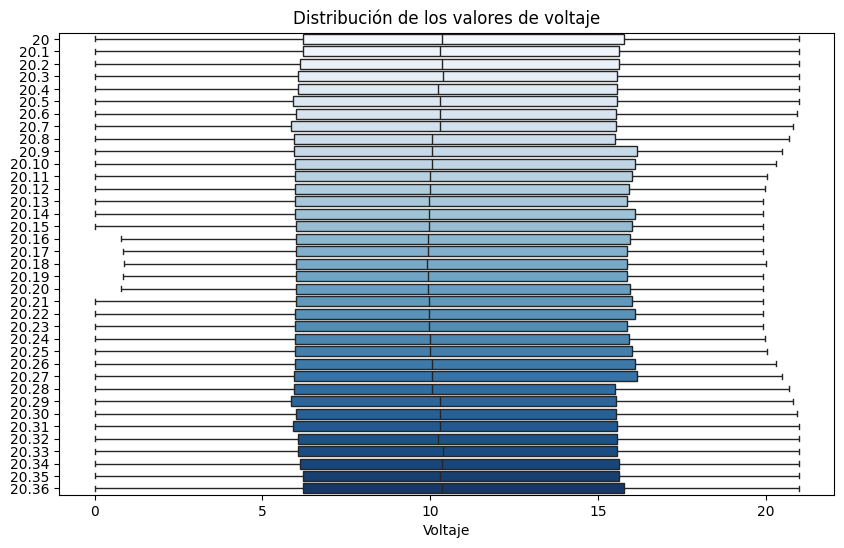

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [ ]:
# pandas: Para cargar y manejar tus datos en tablas.

# numpy: Para cálculos numéricos.

# matplotlib.pyplot y seaborn: Para graficar.

# KMeans: El algoritmo que agrupa los datos según similitudes.

# StandardScaler: Para normalizar los datos antes del clustering.



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Cargar el archivo Excel


from google.colab import files
uploaded = files.upload()
df = pd.read_excel("Datosfinales.xlsx", sheet_name="Hoja1")

# Verificar valores faltantes, Revisa si hay valores vacíos o nulos. Esto es importante porque KMeans no funciona con datos faltantes.


print("Valores faltantes:", df.isnull().sum().sum())

# Estadísticas descriptivas,nos da información básica de cada columna numérica: media, desviación estándar, min, max, etc.
print("\nEstadísticas descriptivas:")
print(df.describe())

# Visualizar distribución de los valores: el codigo nos muestra la dispersión de los datos, y  posibles valores atípicos, etc. Es útil
# para entender la variabilidad.

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient="h", palette="Blues")
plt.title("Distribución de los valores de voltaje")
plt.xlabel("Voltaje")
plt.show()

# Estandarizar los datos,  El codigo Normaliza todos los datos para que estén en la misma escala (media 0, desviación estándar 1),
#lo cual es fundamental para que el KMeans no se sesgue por columnas con valores más grandes.

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Método del codo para encontrar el número óptimo de clusters, El WCSS (Within-Cluster Sum of Squares) mide qué tan compactos están los grupos.

# Se quiere probar  con 1 hasta 10 clusters para ver cuál es el mejor número de grupos.


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo, Aquí se muestra la curva del método del codo. El “codo” indica cuántos grupos (clusters) son los más adecuados. Por ejemplo, si el codo está en K=3, probablemente hay 3 patrones distintos de voltaje.
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Suma de Cuadrados de las Distancias)')
plt.title('Método del Codo para determinar K óptimo')
plt.show()

In [ ]:
df.columns = df.columns.astype(str)
df_scaled = scaler.fit_transform(df)


In [ ]:
# ... (your existing code) ...

# Cargar el archivo Excel
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("Datosfinales.xlsx", sheet_name="Hoja1")

# ... (your existing code) ...

# Estandarizar los datos
scaler = StandardScaler()
# Convert all column names to strings before scaling
df.columns = df.columns.astype(str)
df_scaled = scaler.fit_transform(df)

# ... (rest of your code) ...

Saving Datosfinales.xlsx to Datosfinales (3).xlsx


In [ ]:
print("Valores faltantes:", df.isnull().sum().sum())

Valores faltantes: 0


In [ ]:
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
              20       20.1       20.2       20.3       20.4       20.5  \
count  86.000000  86.000000  86.000000  86.000000  86.000000  86.000000   
mean   10.983837  10.963837  11.006395  10.954535  10.891512  10.822558   
std     6.181124   6.183168   6.200345   6.234980   6.244962   6.315040   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     6.222500   6.222500   6.117500   6.065000   6.050000   5.925000   
50%    10.350000  10.300000  10.350000  10.400000  10.250000  10.300000   
75%    15.787500  15.627500  15.625000  15.582500  15.570000  15.580000   
max    21.000000  21.000000  21.000000  21.000000  21.000000  21.000000   

            20.6       20.7       20.8       20.9  ...      20.27      20.28  \
count  86.000000  86.000000  86.000000  86.000000  ...  86.000000  86.000000   
mean   10.815000  10.748721  10.701977  10.702791  ...  10.702791  10.701977   
std     6.320774   6.330022   6.257245   6.258820  ...  

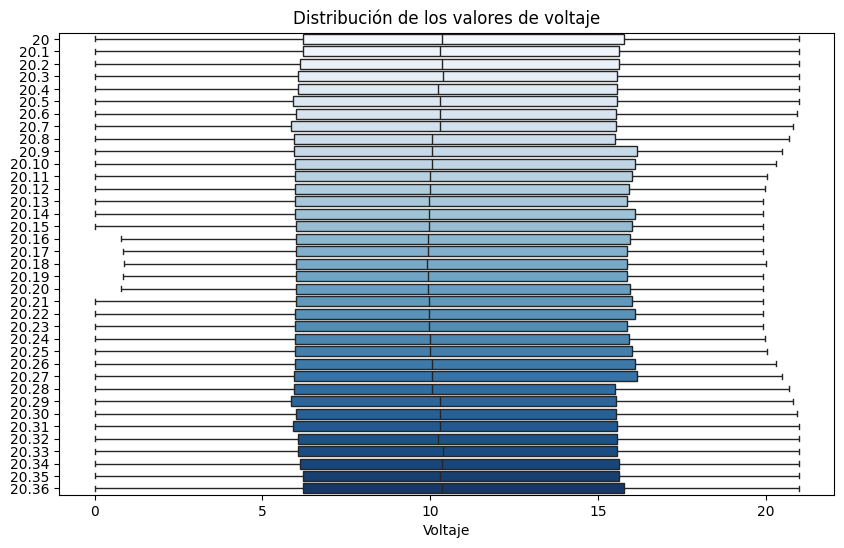

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient="h", palette="Blues")
plt.title("Distribución de los valores de voltaje")
plt.xlabel("Voltaje")
plt.show()


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

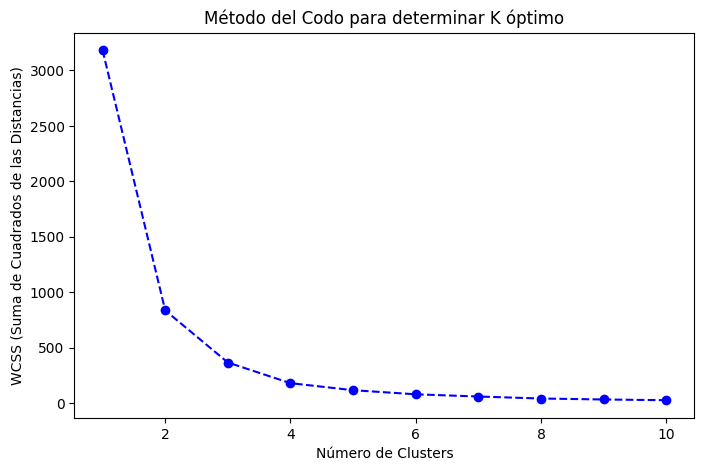

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Suma de Cuadrados de las Distancias)')
plt.title('Método del Codo para determinar K óptimo')
plt.show()



import pandas as pd:

Importa la biblioteca Pandas y la renombra como pd. Esta biblioteca es fundamental para manejar y analizar datos estructurados (como los de archivos Excel, CSV, etc.).

file_path = "Datosfinales.xlsx":

 Define la ruta o nombre del archivo Excel que se desea cargar. En este caso, el archivo se llama Datosfinales.xlsx y debe estar en la misma carpeta donde estás ejecutando el código.

df = pd.read_excel(file_path, sheet_name="Hoja1"):

Utiliza la función read_excel de Pandas para leer el contenido de la hoja de Excel llamada "Hoja1" y lo guarda como un DataFrame de Pandas en la variable df. Ese DataFrame es una tabla con filas y columnas.

print(df.head()):

Muestra las primeras 5 filas del DataFrame para verificar que los datos se hayan cargado correctamente. Sirve como una vista previa rápida del contenido.

Este fragmento es el primer paso esencial cuando sequiere analizar o aplicar machine learning a nuestros datos: cargar y verificar que el conjunto esté bien importado.

In [ ]:
import pandas as pd

# Cargar el archivo Excel
file_path = "Datosfinales.xlsx"
df = pd.read_excel(file_path, sheet_name="Hoja1")

# Verificar que se cargó correctamente
print(df.head())  # Muestra las primeras filas

      20   20.1   20.2   20.3   20.4  20.5   20.6   20.7   20.8   20.9  ...  \
0  20.20  20.20  20.20  20.15  20.20  20.2  20.20  20.14  20.05  20.00  ...   
1  20.67  20.67  20.67  20.37  20.31  20.4  20.40  20.21  20.15  20.05  ...   
2  20.55  20.55  20.55  20.45  20.42  20.6  20.60  20.37  20.27  20.27  ...   
3  20.72  20.72  20.72  20.62  20.64  20.7  20.70  20.46  20.35  20.25  ...   
4  20.95  20.95  20.95  20.85  20.70  20.9  20.82  20.52  20.43  20.32  ...   

   20.27  20.28  20.29  20.30  20.31  20.32  20.33  20.34  20.35  20.36  
0  20.00  20.05  20.14  20.20   20.2  20.20  20.15  20.20  20.20  20.20  
1  20.05  20.15  20.21  20.40   20.4  20.31  20.37  20.67  20.67  20.67  
2  20.27  20.27  20.37  20.60   20.6  20.42  20.45  20.55  20.55  20.55  
3  20.25  20.35  20.46  20.70   20.7  20.64  20.62  20.72  20.72  20.72  
4  20.32  20.43  20.52  20.82   20.9  20.70  20.85  20.95  20.95  20.95  

[5 rows x 37 columns]


In [ ]:
# Asegurar que todos los nombres de las columnas sean strings
df.columns = df.columns.astype(str)

# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=["number"])

# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

1. Convierte todos los nombres de columnas del DataFrame df a cadenas de texto (str).

Algunas funciones de machine learning (como StandardScaler de scikit-learn) requieren que los nombres de las columnas sean todos del mismo tipo, normalmente str. Si tienes una mezcla de tipos (por ejemplo, int y str), se lanza un error como el que ya viste. Esta línea previene ese error.

2. Filtra el DataFrame original y selecciona solo las columnas que contienen datos numéricos (enteros y flotantes).

Los algoritmos de machine learning, como KMeans, solo trabajan con datos numéricos. Esta línea elimina cualquier columna de texto o categórica para evitar errores.

3. StandardScaler() crea un objeto que puede escalar tus datos.

Hace que cada columna tenga media 0 y desviación estándar 1.
La normalización es crucial en muchos algoritmos de ML (como KMeans) para que todas las variables contribuyan por igual. Si una columna tiene valores mucho mayores que otra, el modelo podría darle más importancia injustamente.



# *Vamos a aplicar un algoritmo de machine learning a los datos normalizados. Como ya tenemos los datos limpios y escalados, uno de los algoritmos más sencillos y útiles para análisis exploratorio es KMeans, que permite encontrar grupos o patrones en los datos*

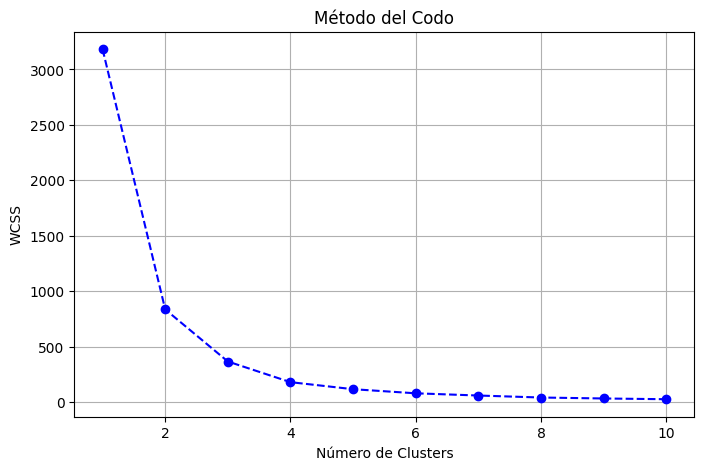

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Paso 1: Aplicar el método del codo para determinar el número óptimo de clusters
wcss = []  # WCSS: within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Paso 2: Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


Este bloque te ayuda a encontrar cuántos grupos (clusters) existen naturalmente en tus datos, evaluando cómo varía la compacidad de los grupos cuando aumentas el número de clusters. Se llama método del codo porque en la gráfica suele aparecer un “codo” o curva donde ya no mejora tanto la agrupación al agregar más clusters.

In [ ]:
# Aplicar KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

# Agregar la columna de cluster al DataFrame original
df['Cluster'] = clusters

# Ver los primeros resultados
print(df[['Cluster'] + df_numeric.columns.tolist()].head())


   Cluster     20   20.1   20.2   20.3   20.4  20.5   20.6   20.7   20.8  ...  \
0        1  20.20  20.20  20.20  20.15  20.20  20.2  20.20  20.14  20.05  ...   
1        1  20.67  20.67  20.67  20.37  20.31  20.4  20.40  20.21  20.15  ...   
2        1  20.55  20.55  20.55  20.45  20.42  20.6  20.60  20.37  20.27  ...   
3        1  20.72  20.72  20.72  20.62  20.64  20.7  20.70  20.46  20.35  ...   
4        1  20.95  20.95  20.95  20.85  20.70  20.9  20.82  20.52  20.43  ...   

   20.27  20.28  20.29  20.30  20.31  20.32  20.33  20.34  20.35  20.36  
0  20.00  20.05  20.14  20.20   20.2  20.20  20.15  20.20  20.20  20.20  
1  20.05  20.15  20.21  20.40   20.4  20.31  20.37  20.67  20.67  20.67  
2  20.27  20.27  20.37  20.60   20.6  20.42  20.45  20.55  20.55  20.55  
3  20.25  20.35  20.46  20.70   20.7  20.64  20.62  20.72  20.72  20.72  
4  20.32  20.43  20.52  20.82   20.9  20.70  20.85  20.95  20.95  20.95  

[5 rows x 38 columns]


Agrupa los datos en 3 grupos diferentes basados en similitudes.

Añade una columna Cluster que indica a qué grupo pertenece cada fila de tus datos.

# *1. VISUALIZACIÓN DE CLUSTERS EN 2D*

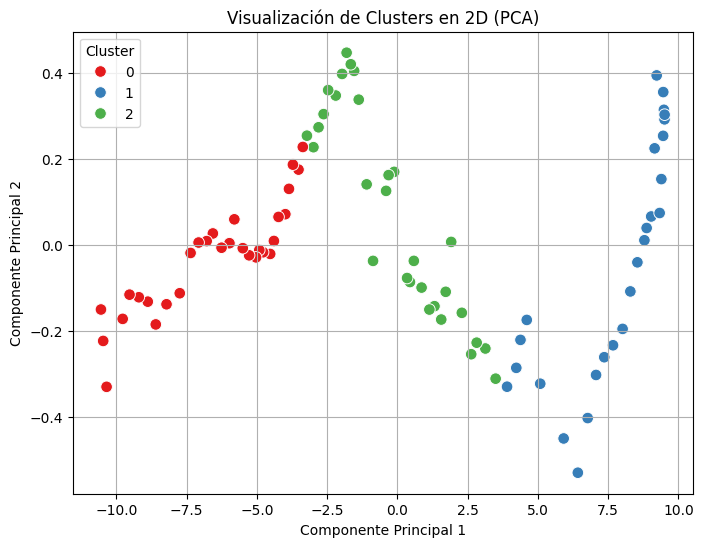

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Reducir a 2 dimensiones con PCA para graficar
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components_2d = pca.fit_transform(df_scaled)

# Crear un DataFrame con los componentes y los clusters
df_2d = pd.DataFrame(data=components_2d, columns=['PC1', 'PC2'])
df_2d['Cluster'] = df['Cluster']

# Visualización con seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_2d, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=70)
plt.title("Visualización de Clusters en 2D (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Este codigo reduce los datos a 2 dimensiones usando PCA (Análisis de Componentes Principales) para que puedas ver gráficamente cómo están agrupados los puntos. Cada color representa un cluster.

# *1. VISUALIZACIÓN DE CLUSTERS EN 3D*

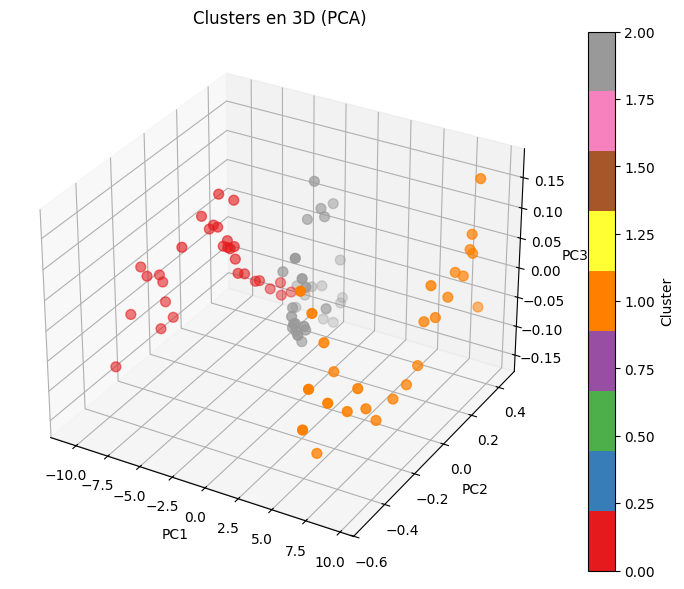

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

# PCA a 3 componentes
pca_3d = PCA(n_components=3)
components_3d = pca_3d.fit_transform(df_scaled)

df_3d = pd.DataFrame(data=components_3d, columns=['PC1', 'PC2', 'PC3'])
df_3d['Cluster'] = df['Cluster']

# Graficar en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_3d['PC1'], df_3d['PC2'], df_3d['PC3'],
                     c=df_3d['Cluster'], cmap='Set1', s=50)

ax.set_title("Clusters en 3D (PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.colorbar(scatter, label='Cluster')
plt.show()


Similar al anterior, pero ahora se puede ver una representación tridimensional, lo cual a veces muestra mejor cómo se separan los grupos.

In [ ]:
# Agrupar por cluster y calcular promedio de cada variable numérica
cluster_summary = df.groupby('Cluster')[df_numeric.columns].mean()
print(cluster_summary)


                20       20.1       20.2       20.3       20.4       20.5  \
Cluster                                                                     
0         4.322333   4.305333   4.318667   4.257667   4.178333   4.054667   
1        18.608462  18.601538  18.680385  18.726538  18.684231  18.737308   
2        11.037333  11.003000  11.043333  10.915667  10.851000  10.731000   

              20.6       20.7       20.8       20.9  ...      20.27  \
Cluster                                              ...              
0         4.083333   3.988000   4.047333   4.052600  ...   4.052600   
1        18.725769  18.690769  18.533077  18.586923  ...  18.586923   
2        10.690667  10.626333  10.569667  10.520067  ...  10.520067   

             20.28      20.29      20.30      20.31      20.32      20.33  \
Cluster                                                                     
0         4.047333   3.988000   4.083333   4.054667   4.178333   4.257667   
1        18.533077  18.6907

Esto nos dice el  promedio de voltaje de cada variable (o columna) dentro de cada cluster. Es decir:

*Cluster 0 puede representar valores de voltaje bajos.*

*Cluster 1 puede representar registros con voltajes medios.*

*Cluster 2 puede ser el grupo con los voltajes más altos o inestables.*

Dependiendo de las variables (por ejemplo si tenemoscolumnas como Voltaje_Medido_1, Voltaje_Pico, etc.), se puede interpreta que:

Un cluster representa una condición estable o normal.

Otro puede representar momentos de sobrecarga o picos.

Y otro puede ser una anomalía, fallo o condición crítica en tu experimento.

*Con los 6000 datos que ya analizamos mediante clustering (agrupamiento), podemos seguir adelante. Ya dimos un paso muy importante: estandarizamos los datos, encontramos agrupamientos naturales usando KMeans, y visualizamos los grupos. Ahora podemos profundizar el análisis desde distintas perspectivas*

# 1. Análisis de cada Cluster (perfilado de grupos)

In [ ]:
df_numeric["Cluster"] = kmeans.labels_
df_grouped = df_numeric.groupby("Cluster").mean()
print(df_grouped)


                20       20.1       20.2       20.3       20.4       20.5  \
Cluster                                                                     
0         4.322333   4.305333   4.318667   4.257667   4.178333   4.054667   
1        18.608462  18.601538  18.680385  18.726538  18.684231  18.737308   
2        11.037333  11.003000  11.043333  10.915667  10.851000  10.731000   

              20.6       20.7       20.8       20.9  ...      20.27  \
Cluster                                              ...              
0         4.083333   3.988000   4.047333   4.052600  ...   4.052600   
1        18.725769  18.690769  18.533077  18.586923  ...  18.586923   
2        10.690667  10.626333  10.569667  10.520067  ...  10.520067   

             20.28      20.29      20.30      20.31      20.32      20.33  \
Cluster                                                                     
0         4.047333   3.988000   4.083333   4.054667   4.178333   4.257667   
1        18.533077  18.6907

# 2. Análisis de Componentes Principales (PCA)

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
components = pca.fit_transform(df_scaled)
print(pca.explained_variance_ratio_)  # Esto te dice qué porcentaje de la varianza explica cada componente


[9.98223363e-01 1.35514873e-03 1.42778934e-04]


In [8]:
# ... (your existing code) ...

# Cargar el archivo Excel
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("Datosfinales.xlsx", sheet_name="Hoja1")

# ... (your existing code) ...

# Estandarizar los datos
scaler = StandardScaler()
# Convert all column names to strings before scaling
df.columns = df.columns.astype(str)
df_scaled = scaler.fit_transform(df)

# ... (rest of your code) ...

Saving Datosfinales.xlsx to Datosfinales.xlsx


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Cargar datos
file_path = "Datosfinales.xlsx"  # Asegúrate de subir este archivo al entorno
df = pd.read_excel(file_path, sheet_name="Hoja1")

# 2. Asegurar nombres de columnas como strings
df.columns = df.columns.astype(str)

# 3. Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=["number"])

# 4. Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# 5. Aplicar KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_numeric["Cluster"] = kmeans.fit_predict(df_scaled)


In [13]:
import pandas as pd

# Cargar el archivo Excel
file_path = "Datosfinales.xlsx"
df = pd.read_excel(file_path, sheet_name="Hoja1")

# Verificar que se cargó correctamente
print(df.head())  # Muestra las primeras filas

      20   20.1   20.2   20.3   20.4  20.5   20.6   20.7   20.8   20.9  ...  \
0  20.20  20.20  20.20  20.15  20.20  20.2  20.20  20.14  20.05  20.00  ...   
1  20.67  20.67  20.67  20.37  20.31  20.4  20.40  20.21  20.15  20.05  ...   
2  20.55  20.55  20.55  20.45  20.42  20.6  20.60  20.37  20.27  20.27  ...   
3  20.72  20.72  20.72  20.62  20.64  20.7  20.70  20.46  20.35  20.25  ...   
4  20.95  20.95  20.95  20.85  20.70  20.9  20.82  20.52  20.43  20.32  ...   

   20.27  20.28  20.29  20.30  20.31  20.32  20.33  20.34  20.35  20.36  
0  20.00  20.05  20.14  20.20   20.2  20.20  20.15  20.20  20.20  20.20  
1  20.05  20.15  20.21  20.40   20.4  20.31  20.37  20.67  20.67  20.67  
2  20.27  20.27  20.37  20.60   20.6  20.42  20.45  20.55  20.55  20.55  
3  20.25  20.35  20.46  20.70   20.7  20.64  20.62  20.72  20.72  20.72  
4  20.32  20.43  20.52  20.82   20.9  20.70  20.85  20.95  20.95  20.95  

[5 rows x 37 columns]


In [18]:
# Asegurar que todos los nombres de las columnas sean strings
df.columns = df.columns.astype(str)

# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=["number"])

# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


In [20]:
import matplotlib.pyplot as plt


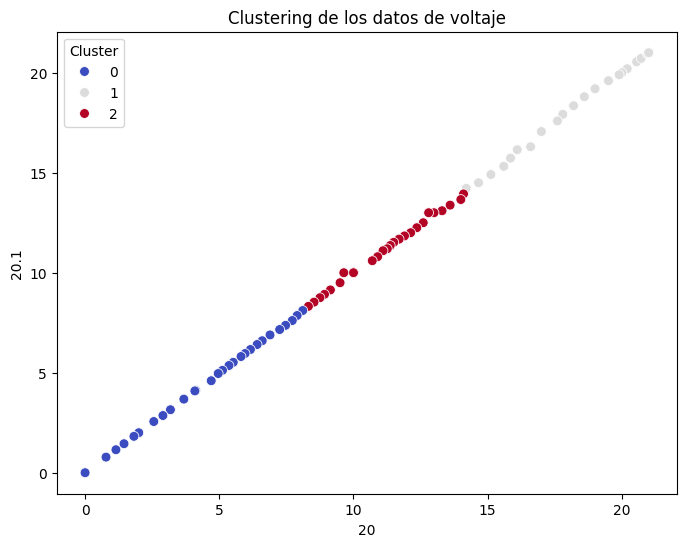

In [21]:
# Asegúrate de importar matplotlib para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_numeric["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualizar los clusters en un gráfico de dispersión (tomando las dos primeras columnas como referencia)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_numeric.iloc[:, 0], y=df_numeric.iloc[:, 1], hue=df_numeric["Cluster"], palette="coolwarm", s=50)
plt.xlabel(df_numeric.columns[0])
plt.ylabel(df_numeric.columns[1])
plt.title("Clustering de los datos de voltaje")
plt.legend(title="Cluster")
plt.show()


Este código aplica el algoritmo K-Means para realizar un análisis de agrupamiento (clustering) en los datos de voltaje de un archivo. Primero, se carga y preprocesa el conjunto de datos, normalizándolo para asegurar que todas las características tengan la misma escala. Luego, el algoritmo K-Means se entrena con tres clusters, lo que asigna a cada punto de datos un grupo según su similitud con otros puntos. Posteriormente, se visualizan los resultados en un gráfico de dispersión 2D usando las dos primeras columnas de los datos, donde cada punto se colorea según el cluster al que pertenece, lo que facilita la interpretación de las agrupaciones formadas por el modelo. La visualización se crea usando la librería matplotlib y seaborn para hacerla más atractiva y clara.

In [22]:
# Agregar los clusters al dataframe original
df_numeric["Cluster"] = kmeans.labels_

# Calcular estadísticas por cluster
stats_clusters = df_numeric.groupby("Cluster").agg(["mean", "std"])
print(stats_clusters)

                20                 20.1                 20.2            \
              mean       std       mean       std       mean       std   
Cluster                                                                  
0         4.322333  2.564903   4.305333  2.551101   4.318667  2.521988   
1        18.608462  2.299991  18.601538  2.352268  18.680385  2.281967   
2        11.037333  1.677854  11.003000  1.616783  11.043333  1.662693   

              20.3                 20.4            ...      20.32            \
              mean       std       mean       std  ...       mean       std   
Cluster                                            ...                        
0         4.257667  2.490769   4.178333  2.431670  ...   4.178333  2.431670   
1        18.726538  2.202776  18.684231  2.173204  ...  18.684231  2.173204   
2        10.915667  1.733664  10.851000  1.804910  ...  10.851000  1.804910   

             20.33                20.34                20.35            \
      

Este código agrega los resultados del análisis de clustering (asignación de clusters) al DataFrame original, creando una nueva columna llamada "Cluster" que contiene la etiqueta del grupo al que pertenece cada punto de datos (obtenida a partir de los resultados de K-Means). Luego, el código calcula estadísticas descriptivas (media y desviación estándar) para cada cluster, utilizando la función groupby para agrupar los datos por la columna "Cluster" y agg para calcular las estadísticas. El resultado es una tabla que muestra, para cada cluster, la media y la desviación estándar de las variables numéricas presentes en el conjunto de datos, lo que permite comparar cómo se comportan los distintos grupos en términos de las características de los datos de voltaje.

<ipython-input-25-017b6f53b438>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_numeric["Cluster"], y=df_numeric[column], palette="coolwarm")
<ipython-input-25-017b6f53b438>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_numeric["Cluster"], y=df_numeric[column], palette="coolwarm")
<ipython-input-25-017b6f53b438>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_numeric["Cluster"], y=df_numeric[column], palette="coolwarm")
<ipython-input-25-017b6f53b438>:15: FutureWarning: 

Passing `palette` without assigning `hue` is de

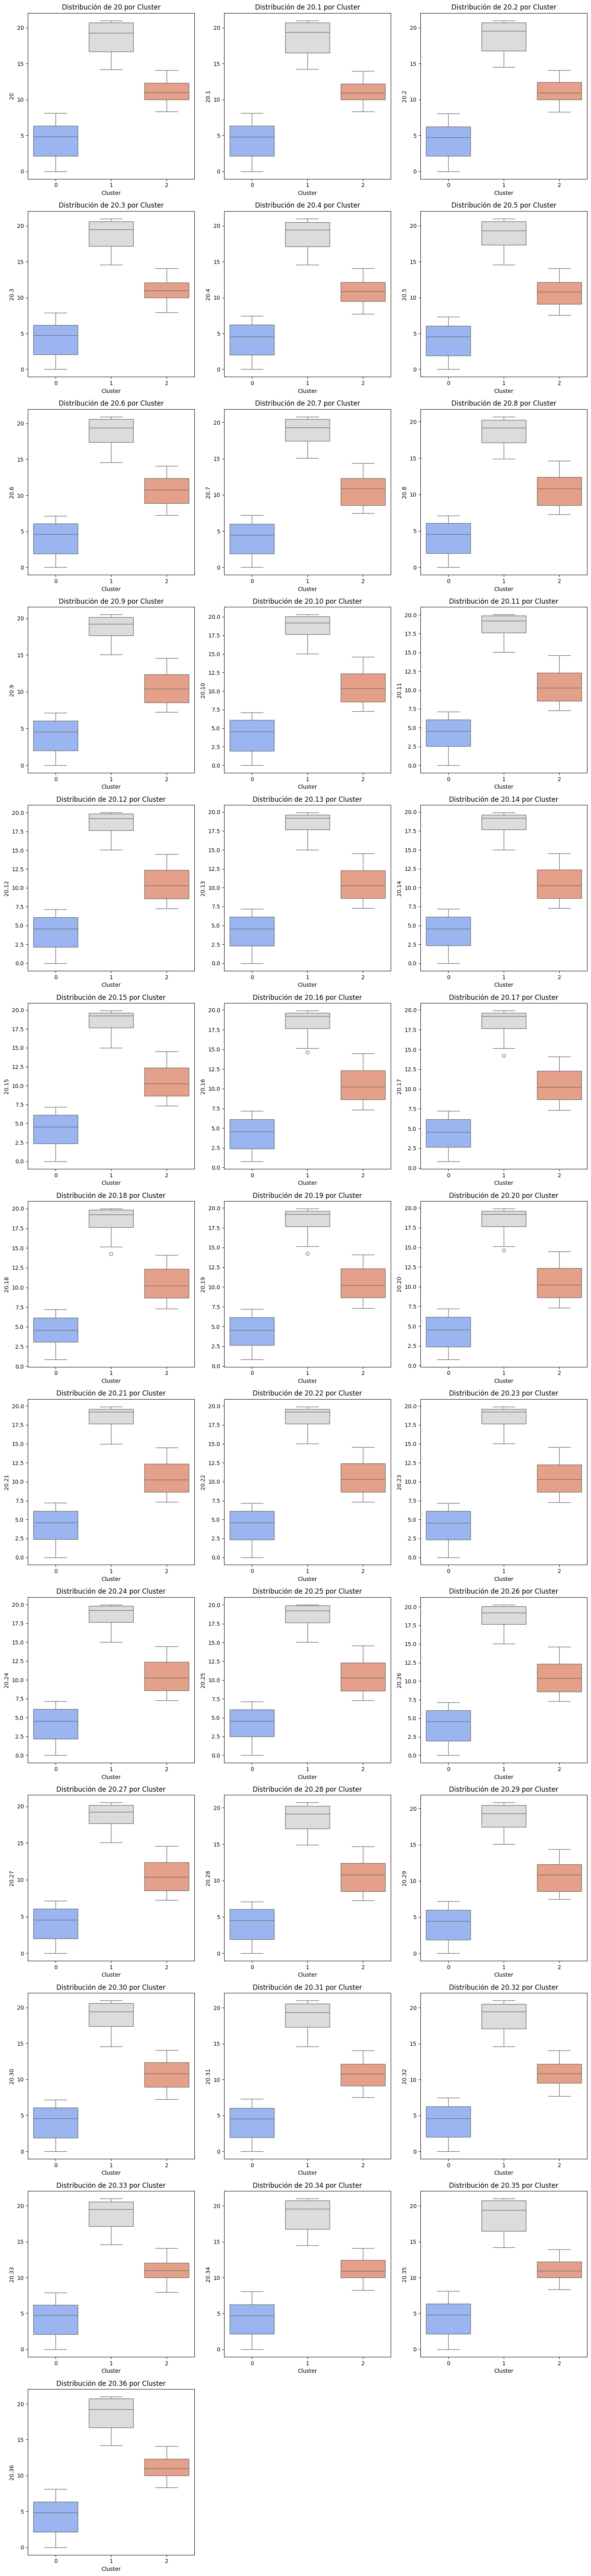

In [25]:
import math

# Número de variables (excluyendo "Cluster")
num_vars = len(df_numeric.columns) - 1

# Calcular filas y columnas necesarias
num_cols = 3
num_rows = math.ceil(num_vars / num_cols)

plt.figure(figsize=(15, 5 * num_rows))

# Crear un boxplot para cada variable
for i, column in enumerate(df_numeric.columns[:-1]):  # Excluimos "Cluster"
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=df_numeric["Cluster"], y=df_numeric[column], palette="coolwarm")
    plt.title(f"Distribución de {column} por Cluster")

plt.tight_layout()
plt.show()

Este código genera un conjunto de gráficos de caja (boxplots) para cada variable numérica en el DataFrame, mostrando la distribución de cada variable agrupada por los clusters obtenidos mediante K-Means. Primero, calcula cuántas filas y columnas serán necesarias para organizar los gráficos en una cuadrícula, utilizando la cantidad de variables (sin contar la columna "Cluster"). Luego, con un ciclo for, recorre cada columna numérica del DataFrame y genera un boxplot por cada una. Los boxplots permiten visualizar la mediana, los cuartiles y los valores atípicos de cada variable dentro de cada cluster, lo que facilita la comparación de las distribuciones entre los diferentes grupos. Finalmente, ajusta el diseño de los gráficos para que se vean bien organizados y los muestra en pantalla.

In [27]:
print(df.columns)  # Verifica si "Cluster" está en df
print(df.head())  # Muestra las primeras filas para ver si está la columna

Index(['20', '20.1', '20.2', '20.3', '20.4', '20.5', '20.6', '20.7', '20.8',
       '20.9', '20.10', '20.11', '20.12', '20.13', '20.14', '20.15', '20.16',
       '20.17', '20.18', '20.19', '20.20', '20.21', '20.22', '20.23', '20.24',
       '20.25', '20.26', '20.27', '20.28', '20.29', '20.30', '20.31', '20.32',
       '20.33', '20.34', '20.35', '20.36'],
      dtype='object')
      20   20.1   20.2   20.3   20.4  20.5   20.6   20.7   20.8   20.9  ...  \
0  20.20  20.20  20.20  20.15  20.20  20.2  20.20  20.14  20.05  20.00  ...   
1  20.67  20.67  20.67  20.37  20.31  20.4  20.40  20.21  20.15  20.05  ...   
2  20.55  20.55  20.55  20.45  20.42  20.6  20.60  20.37  20.27  20.27  ...   
3  20.72  20.72  20.72  20.62  20.64  20.7  20.70  20.46  20.35  20.25  ...   
4  20.95  20.95  20.95  20.85  20.70  20.9  20.82  20.52  20.43  20.32  ...   

   20.27  20.28  20.29  20.30  20.31  20.32  20.33  20.34  20.35  20.36  
0  20.00  20.05  20.14  20.20   20.2  20.20  20.15  20.20  20.20  20.20 

In [28]:
print(df.columns)  # Muestra todas las columnas

Index(['20', '20.1', '20.2', '20.3', '20.4', '20.5', '20.6', '20.7', '20.8',
       '20.9', '20.10', '20.11', '20.12', '20.13', '20.14', '20.15', '20.16',
       '20.17', '20.18', '20.19', '20.20', '20.21', '20.22', '20.23', '20.24',
       '20.25', '20.26', '20.27', '20.28', '20.29', '20.30', '20.31', '20.32',
       '20.33', '20.34', '20.35', '20.36'],
      dtype='object')


In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)  # Ajusta el número de clusters según tu caso
df["Cluster"] = kmeans.fit_predict(df)  # Agrega la columna con los clusters

<ipython-input-31-5945e5157a32>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster"], y=df[column], palette="coolwarm")
<ipython-input-31-5945e5157a32>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster"], y=df[column], palette="coolwarm")
<ipython-input-31-5945e5157a32>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster"], y=df[column], palette="coolwarm")
<ipython-input-31-5945e5157a32>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

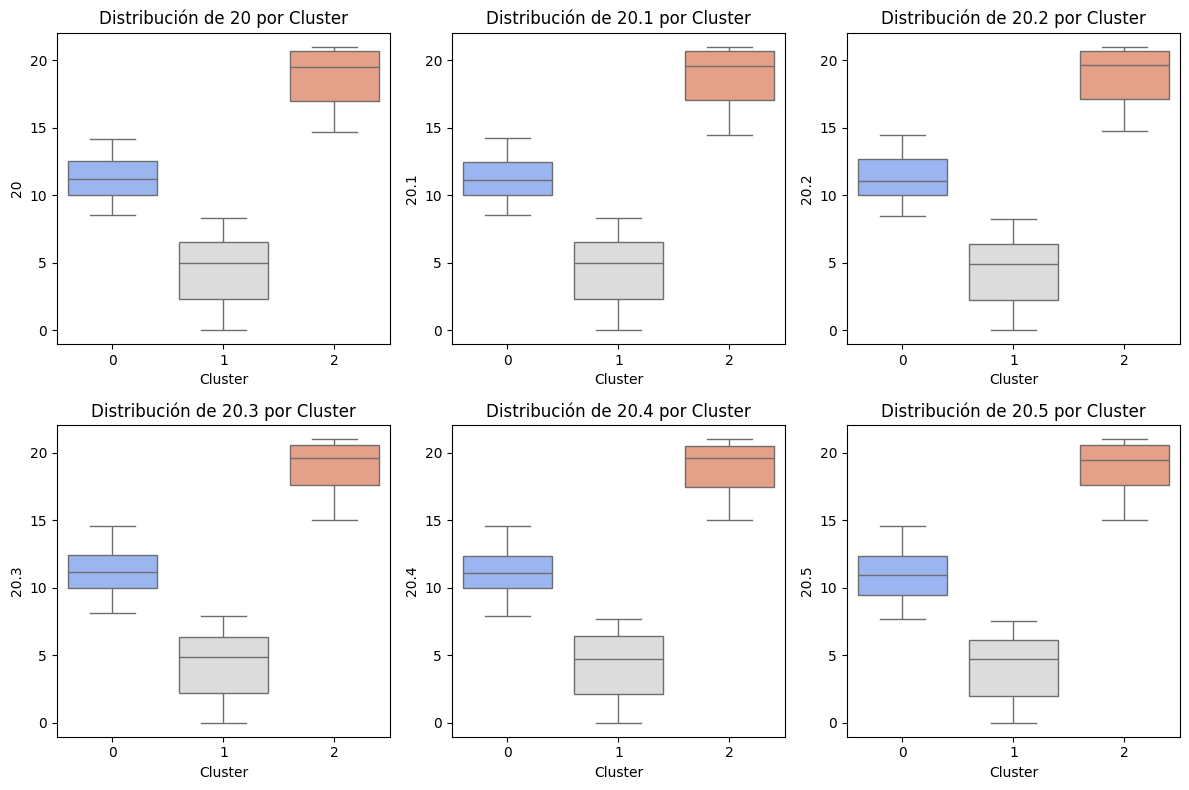

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Crear un boxplot para algunas variables (elige las más relevantes)
for i, column in enumerate(df.columns[:6]):  # Ajusta el número de columnas según lo que quieras ver
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df["Cluster"], y=df[column], palette="coolwarm")
    plt.title(f"Distribución de {column} por Cluster")

plt.tight_layout()
plt.show()

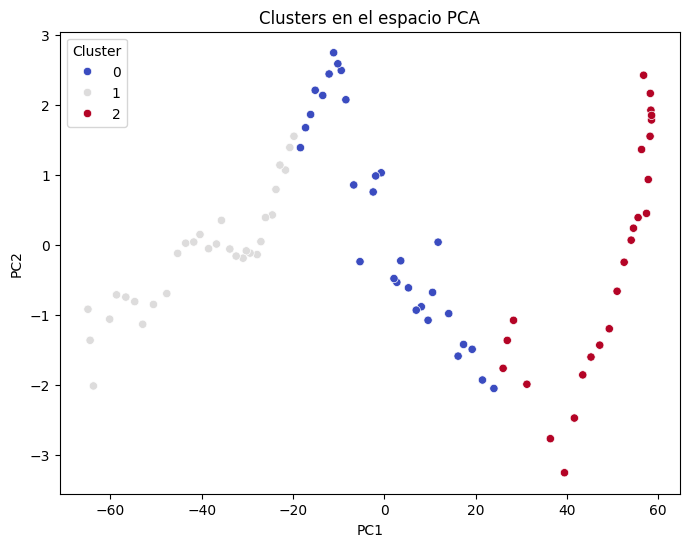

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=["Cluster"]))  # Quitamos la columna "Cluster" para la transformación

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df["Cluster"], palette="coolwarm")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters en el espacio PCA")
plt.show()

Acelerador de iones ligeros para BNCT. Ahora, para aprovechar los 6000 datos que tomaste en el laboratorio de voltaje en la bandeja electrolítica, podemos aplicar los algoritmos que aprendimos hoy. Aquí algunas ideas:
    Análisis Exploratorio de Datos (EDA)
•	Graficar las líneas equipotenciales y vectores de campo eléctrico con Python.
•	Ver la distribución de voltajes y posibles anomalías en los datos.
   Reducción de Dimensionalidad (PCA)
•	Si hay muchas variables en los datos, podemos aplicar PCA para visualizar en 2D o 3D.
•	Esto nos puede ayudar a ver patrones en la forma en que los iones se mueven dentro de la columna aceleradora.
  Reglas de Asociación (Apriori / FP-Growth)
•	Buscar relaciones entre diferentes voltajes y configuraciones de los electrodos.
•	¿Podemos identificar qué configuraciones generan un mejor enfoque de los iones?
 Predicción con Modelos de Aprendizaje Automático
•	Usar DecisionTreeClassifier o RandomForestClassifier para predecir cómo se comportará el campo eléctrico dependiendo de la configuración de los electrodos.
•	Si tienes etiquetas sobre el comportamiento de los iones, podemos hacer clasificación o regresión.
Optimización con Redes de Hopfield
•	Si queremos encontrar el mejor camino para los iones dentro de la columna aceleradora, podríamos experimentar con redes de Hopfield.
